In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bollywood Movie List (1920-2024).csv to Bollywood Movie List (1920-2024).csv


In [ ]:
import pandas as pd
import numpy as np

movies_df = pd.read_csv('Bollywood Movie List (1920-2024).csv')
movies_df

,Movie ID,Title,Year,Genre
0,3456,balika badhu a.k.a. baby bride,1920,social
1,3476,vikram urvashi,1920,mythology
2,3474,sita swayamwar a.k.a. sita's marriage,1920,mythology
3,3473,shri rama janma,1920,mythology
4,3472,shri krishna leela,1920,mythology
...,...,...,...,...
9438,12895,teri baaton mein aisa uljha jiya,2024,NaN
9439,12896,article 370,2024,NaN
9440,12897,merry christmas,2024,NaN
9441,12898,crakk,2024,NaN


<Axes: xlabel='Year'>

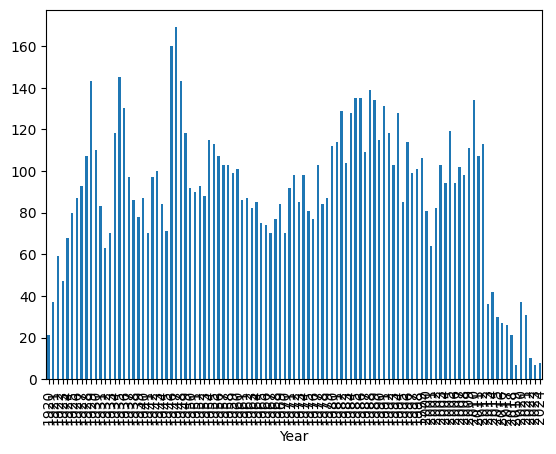

In [ ]:
# @title Movies Released by Year

movies_df.groupby('Year')['Movie ID'].count().plot(kind='bar')

In [ ]:
movies_df.dropna(inplace=True)
movies_df.isnull().sum()

Movie ID    0
Title       0
Year        0
Genre       0
dtype: int64

In [ ]:
movies_df.Genre = movies_df.Genre.map(lambda x: x.replace('\n',''))


In [ ]:
movies_df

,Movie ID,Title,Year,Genre
0,3456,balika badhu a.k.a. baby bride,1920,social
1,3476,vikram urvashi,1920,mythology
2,3474,sita swayamwar a.k.a. sita's marriage,1920,mythology
3,3473,shri rama janma,1920,mythology
4,3472,shri krishna leela,1920,mythology
...,...,...,...,...
9317,12761,the great leader kanshiram,2017,biopic
9318,12762,running shaadi,2017,comedy
9319,12763,the ghazi attack,2017,action
9320,12764,irada,2017,thriller drama


In [ ]:
movies_df.Genre = movies_df.Genre.str.split()
movies_df

,Movie ID,Title,Year,Genre
0,3456,balika badhu a.k.a. baby bride,1920,[social]
1,3476,vikram urvashi,1920,[mythology]
2,3474,sita swayamwar a.k.a. sita's marriage,1920,[mythology]
3,3473,shri rama janma,1920,[mythology]
4,3472,shri krishna leela,1920,[mythology]
...,...,...,...,...
9317,12761,the great leader kanshiram,2017,[biopic]
9318,12762,running shaadi,2017,[comedy]
9319,12763,the ghazi attack,2017,[action]
9320,12764,irada,2017,"[thriller, drama]"


In [ ]:
newMovieDf = movies_df.copy()

for index, row in movies_df.iterrows():
    for genre in row['Genre']:
        newMovieDf.at[index, genre.strip()] = 1


<ipython-input-21-f2ad1b8b2496>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newMovieDf.at[index, genre.strip()] = 1
<ipython-input-21-f2ad1b8b2496>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newMovieDf.at[index, genre.strip()] = 1
<ipython-input-21-f2ad1b8b2496>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

In [ ]:
newMovieDf


,Movie ID,Title,Year,Genre,social,mythology,drama,devotional,documentary,comedy,...,footage,road,teen,cult,rom-com,computer-animated,heist,abrar,qazi,experimental
0,3456,balika badhu a.k.a. baby bride,1920,[social],1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3476,vikram urvashi,1920,[mythology],NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3474,sita swayamwar a.k.a. sita's marriage,1920,[mythology],NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3473,shri rama janma,1920,[mythology],NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3472,shri krishna leela,1920,[mythology],NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,12761,the great leader kanshiram,2017,[biopic],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9318,12762,running shaadi,2017,[comedy],NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9319,12763,the ghazi attack,2017,[action],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9320,12764,irada,2017,"[thriller, drama]",NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
newMovieDf.fillna(0, inplace=True)
newMovieDf

,Movie ID,Title,Year,Genre,social,mythology,drama,devotional,documentary,comedy,...,footage,road,teen,cult,rom-com,computer-animated,heist,abrar,qazi,experimental
0,3456,balika badhu a.k.a. baby bride,1920,[social],1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3476,vikram urvashi,1920,[mythology],0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3474,sita swayamwar a.k.a. sita's marriage,1920,[mythology],0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3473,shri rama janma,1920,[mythology],0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3472,shri krishna leela,1920,[mythology],0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,12761,the great leader kanshiram,2017,[biopic],0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9318,12762,running shaadi,2017,[comedy],0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9319,12763,the ghazi attack,2017,[action],0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9320,12764,irada,2017,"[thriller, drama]",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
